In [1]:
from core.data import LiteratureDataset
from core.nlp import NlpPipeline
from core.viz import DataViz

dataset = LiteratureDataset()
nlp_pipeline = NlpPipeline()
data_viz = DataViz()

[nltk_data] Downloading package punkt to /home/husmen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/husmen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/husmen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[11/06/23 07:07:01] INFO     INFO:gensim.utils:Doc2Vec lifecycle event {'params':                      ]8;id=424284;file:///data/ws/MedicalResearchTextAnalyser/.venv/lib64/python3.11/site-packages/gensim/utils.py\utils.py]8;;\:]8;id=840414;file:///data/ws/MedicalResearchTextAnalyser/.venv/lib64/python3.11/site-packages/gensim/utils.py#448\448]8;;\
                             'Doc2Vec<dm/m,d30,n5,w5,mc2,s0.001,t3>', 'datetime':                                  
                             '2023-11-06T07:07:01.261129', 'gensim': '4.3.2', 'python': '3.11.5 (main,             
                             Aug 31 2023, 07:57:41) [GCC]', 'platform':                                            
                             'Linux-6.5.9-1-default-x86_64-with-glibc2.38', 'event': 'created'}                    

## Dataset Preparation

In [2]:
# Dataset creation
dataset.load_data()
dataset.preview_data()

4
D1: Articles - Full
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 33 to 765
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          500 non-null    object 
 1   Abstract       500 non-null    object 
 2   Authors        500 non-null    object 
 3   Year           500 non-null    int64  
 4   Cited by       500 non-null    float64
 5   Document Type  500 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.3+ KB
                                                 Title  \
33   Large language models for structured reporting...   
125  Radiomics and Deep Learning for Disease Detect...   
87   Online for on Call: A Study Assessing the Use ...   
96   Diagnostic radiology and its future: what do c...   
127  ChestXRayBERT: A Pretrained Language Model for...   

                                              Abstract  \
33   Structured reporting may improve the radiologi...  

In [3]:
# list of abstracts as D1-4
dataset_abs = [dataset.get_abstracts(i) for i in range(len(dataset))]
dataset_titles = [dataset.get_titles(i) for i in range(len(dataset))]

for desc, db in zip(dataset.data_description, dataset_abs, strict=True):
    print(f"{desc} ({len(db)} works)")
    print(f"\tSample: {db[0]}")

D1: Articles - Full (500 works)
	Sample: Structured reporting may improve the radiological workflow and communication among physicians. Artificial intelligence applications in medicine are growing fast. Large language models (LLMs) are recently gaining importance as valuable tools in radiology and are currently being tested for the critical task of structured reporting. We compared four LLMs models in terms of knowledge on structured reporting and templates proposal. LLMs hold a great potential for generating structured reports in radiology but additional formal validations are needed on this topic. © 2023, Italian Society of Medical Radiology.
D2: Reviews - Full (42 works)
	Sample: Automated labelling of radiology reports using natural language processing allows for the labelling of ground truth for large datasets of radiological studies that are required for training of computer vision models. This paper explains the necessary data preprocessing steps, reviews the main methods for au

## NLP Pipeline

### Preprocessing

In [4]:
dataset_tkns = [nlp_pipeline.preprocess(db, True) for db in dataset_abs]

for desc, db in zip(dataset.data_description, dataset_tkns, strict=True):
    print(f"{desc} ({len(db)} works)")
    print(f"\tSample: {db[0]}")

D1: Articles - Full (500 works)
	Sample: ['structur', 'report', 'may', 'improv', 'radiolog', 'workflow', 'communic', 'among', 'physician', 'artifici', 'intellig', 'applic', 'medicin', 'grow', 'fast', 'larg', 'languag', 'model', 'llms', 'recent', 'gain', 'import', 'valuabl', 'tool', 'radiolog', 'current', 'test', 'critic', 'task', 'structur', 'report', 'compar', 'four', 'llms', 'model', 'term', 'knowledg', 'structur', 'report', 'templat', 'propos', 'llms', 'hold', 'great', 'potenti', 'generat', 'structur', 'report', 'radiolog', 'addit', 'formal', 'valid', 'need', 'topic', 'italian', 'societi', 'medic', 'radiolog']
D2: Reviews - Full (42 works)
	Sample: ['autom', 'label', 'radiolog', 'report', 'use', 'natur', 'languag', 'process', 'allow', 'label', 'ground', 'truth', 'larg', 'dataset', 'radiolog', 'studi', 'requir', 'train', 'comput', 'vision', 'model', 'paper', 'explain', 'necessari', 'data', 'preprocess', 'step', 'review', 'main', 'method', 'autom', 'label', 'compar', 'perform', 'four'

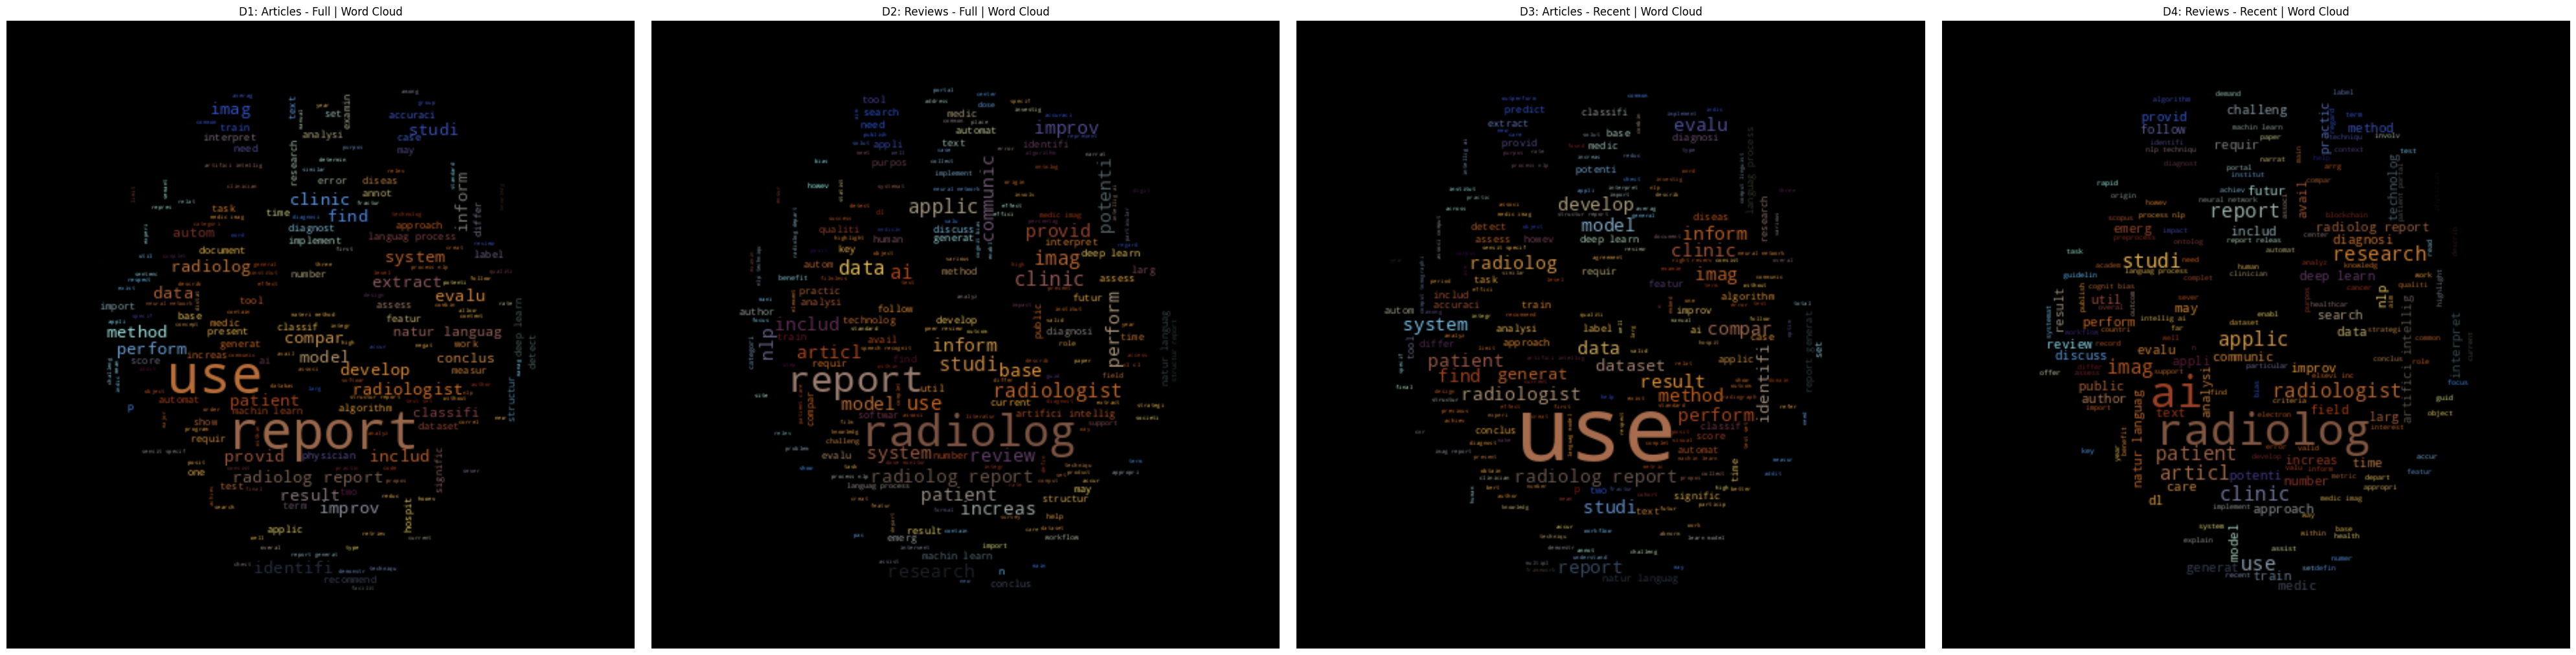

In [5]:
# Word Clouds
fig = data_viz.word_clouds(dataset_tkns, dataset.data_description)
fig.show()

### Topic Modelling with Empath

In [6]:
empath_topics_per_doc, empath_topics_per_db = nlp_pipeline.empath(dataset_tkns)

for desc, db in zip(dataset.data_description, empath_topics_per_doc, strict=True):
    print(f"{desc} (Empath)")
    print("Sample:", db[0])

D1: Articles - Full (Empath)
Sample: {'help': 0.0, 'office': 0.0, 'dance': 0.0, 'money': 0.0, 'wedding': 0.0, 'domestic_work': 0.0, 'sleep': 0.0, 'medical_emergency': 0.034482758620689655, 'cold': 0.0, 'hate': 0.0, 'cheerfulness': 0.0, 'aggression': 0.0, 'occupation': 0.017241379310344827, 'envy': 0.0, 'anticipation': 0.0, 'family': 0.0, 'vacation': 0.0, 'crime': 0.06896551724137931, 'attractive': 0.0, 'masculine': 0.0, 'prison': 0.0, 'health': 0.017241379310344827, 'pride': 0.0, 'dispute': 0.0, 'nervousness': 0.0, 'government': 0.0, 'weakness': 0.0, 'horror': 0.0, 'swearing_terms': 0.0, 'leisure': 0.0, 'suffering': 0.0, 'royalty': 0.0, 'wealthy': 0.0, 'tourism': 0.0, 'furniture': 0.0, 'school': 0.034482758620689655, 'magic': 0.0, 'beach': 0.0, 'journalism': 0.06896551724137931, 'morning': 0.0, 'banking': 0.0, 'social_media': 0.0, 'exercise': 0.0, 'night': 0.0, 'kill': 0.0, 'blue_collar_job': 0.0, 'art': 0.0, 'ridicule': 0.0, 'play': 0.0, 'computer': 0.0, 'college': 0.01724137931034482

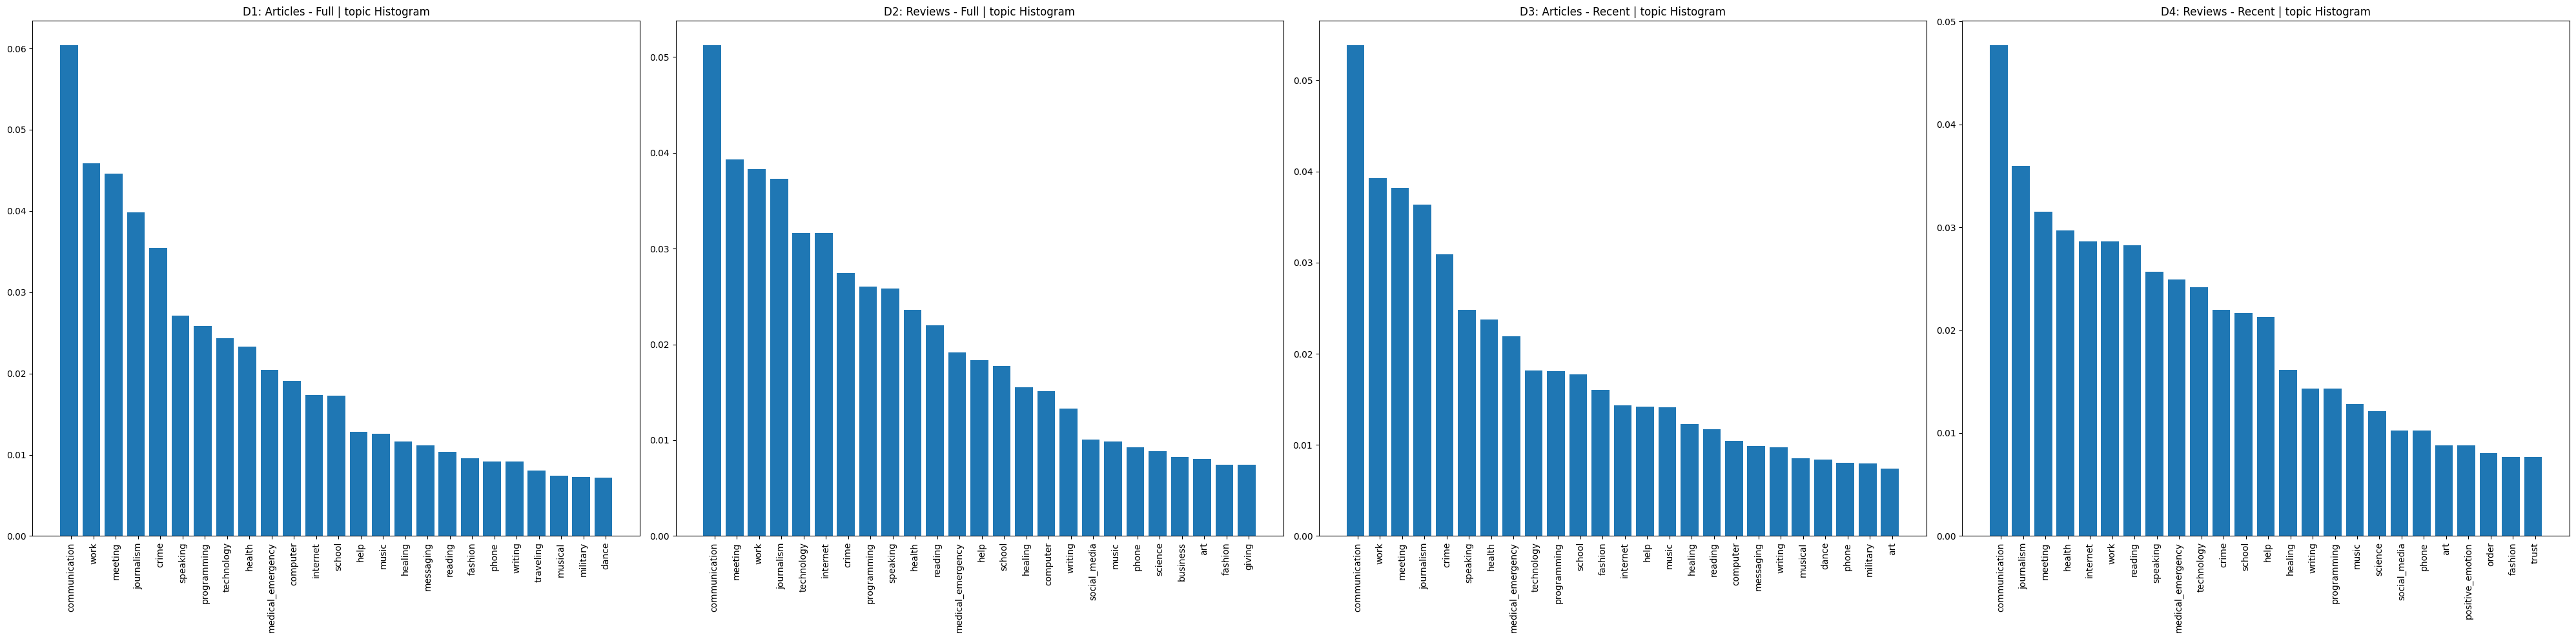

In [7]:
# Topic histogram
fig = data_viz.word_hist(empath_topics_per_db, dataset.data_description)
fig.show()

6it [00:00, 190.72it/s]


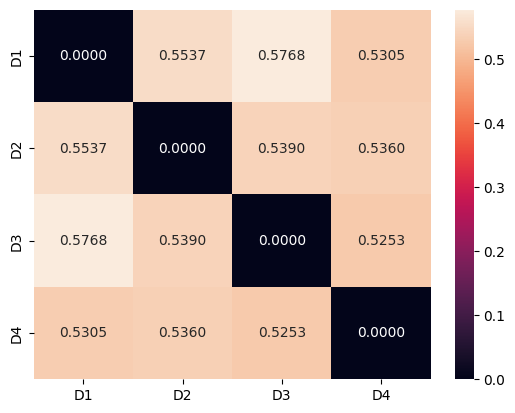

In [8]:
# Topic Similarity between DBs
empath_sim = nlp_pipeline.topics_sim(empath_topics_per_doc)
data_viz.tfidf_heatmap(empath_sim)

### TF-IDF

In [9]:
# Feature extraction from original text
tfidf_tkns, _ = nlp_pipeline.text_features(dataset_tkns, dataset_titles)
print(tfidf_tkns.head(10))

                                                    aaa  abbrevi  abdomen  \
Large language models for structured reporting ...  0.0      0.0      0.0   
Radiomics and Deep Learning for Disease Detecti...  0.0      0.0      0.0   
Online for on Call: A Study Assessing the Use o...  0.0      0.0      0.0   
Diagnostic radiology and its future: what do cl...  0.0      0.0      0.0   
ChestXRayBERT: A Pretrained Language Model for ...  0.0      0.0      0.0   
Decoding radiology reports: Potential applicati...  0.0      0.0      0.0   
From Softmax to Nucleusmax: A Novel Sparse Lang...  0.0      0.0      0.0   
Artificial intelligence vs. radiologist: accura...  0.0      0.0      0.0   
Ability of ChatGPT to generate competent radiol...  0.0      0.0      0.0   
Artificial Intelligence-Powered Clinical Decisi...  0.0      0.0      0.0   

                                                    abdomin  abdominopelv  \
Large language models for structured reporting ...      0.0           0.0  

In [10]:
# TF-IDF visualization

chart = data_viz.tfidf_chart(tfidf_tkns.iloc[len(dataset_abs[0]):len(dataset_abs[0])+len(dataset_abs[1])], 10, dataset.data_description[1])
chart.display()

chart = data_viz.tfidf_chart(tfidf_tkns.iloc[-len(dataset_abs[-1]):], 10, dataset.data_description[-1])
chart.display()

alt.LayerChart(...)

alt.LayerChart(...)

6it [00:00, 75.75it/s]


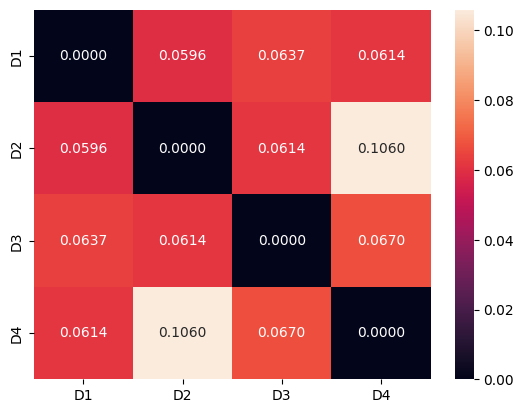

In [11]:
tfidf_sim = nlp_pipeline.tfidf_sim(tfidf_tkns, dataset_titles)
data_viz.tfidf_heatmap(tfidf_sim)

In [12]:
# Feature extrtaction from Empath models
tfidf_tpcs, _ = nlp_pipeline.dict_features(empath_topics_per_doc, dataset_titles)
print(tfidf_tpcs.head(10))

                                                    achievement  affection  \
Large language models for structured reporting ...     0.096225        0.0   
Radiomics and Deep Learning for Disease Detecti...     0.160817        0.0   
Online for on Call: A Study Assessing the Use o...     0.000000        0.0   
Diagnostic radiology and its future: what do cl...     0.044901        0.0   
ChestXRayBERT: A Pretrained Language Model for ...     0.000000        0.0   
Decoding radiology reports: Potential applicati...     0.029136        0.0   
From Softmax to Nucleusmax: A Novel Sparse Lang...     0.000000        0.0   
Artificial intelligence vs. radiologist: accura...     0.074125        0.0   
Ability of ChatGPT to generate competent radiol...     0.053606        0.0   
Artificial Intelligence-Powered Clinical Decisi...     0.000000        0.0   

                                                    aggression  air_travel  \
Large language models for structured reporting ...         0.0 

In [13]:
chart = data_viz.tfidf_chart(tfidf_tpcs.iloc[len(dataset_abs[0]):len(dataset_abs[0])+len(dataset_abs[1])], 10, dataset.data_description[1])
chart.display()

chart = data_viz.tfidf_chart(tfidf_tpcs.iloc[-len(dataset_abs[-1]):], 10, dataset.data_description[-1])
chart.display()

alt.LayerChart(...)

alt.LayerChart(...)

6it [00:00, 446.44it/s]


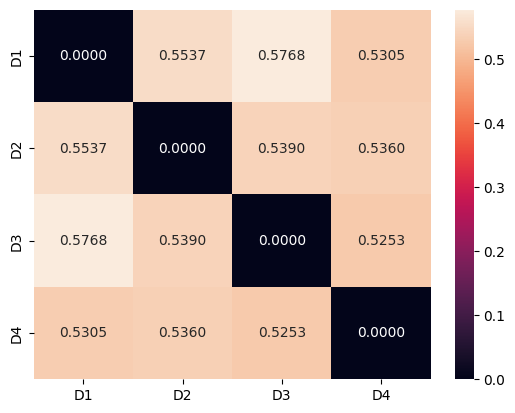

In [14]:
tfidf_sim = nlp_pipeline.tfidf_sim(tfidf_tpcs, dataset_titles)
data_viz.tfidf_heatmap(tfidf_sim)

### Topic Modelling with UMLS